In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from statsmodels.tsa.ar_model import AR

In [2]:
df = pd.read_csv("../nation_incremental.csv")
df["date"] = pd.to_datetime(df.date)
df.index = df.date
start, end = len(df), len(df) * 2

In [3]:
active_ts = df.active
model = AR(active_ts, freq="D").fit(ic="aic", trend="nc")
pactive_ts = active_ts.append(model.predict(start, end))

In [4]:
dead_ts = df.dead
model = AR(dead_ts, freq="D").fit(ic="aic", trend="nc")
pdead_ts = dead_ts.append(model.predict(start, end))

In [5]:
healed_ts = df.healed
model = AR(healed_ts, freq="D").fit(ic="aic", trend="nc")
phealed_ts = healed_ts.append(model.predict(start, end))

In [6]:
pred_df = pd.DataFrame({"active": pactive_ts, "dead": pdead_ts, "healed": phealed_ts})

In [7]:
pred_df_cum = pred_df.cumsum()

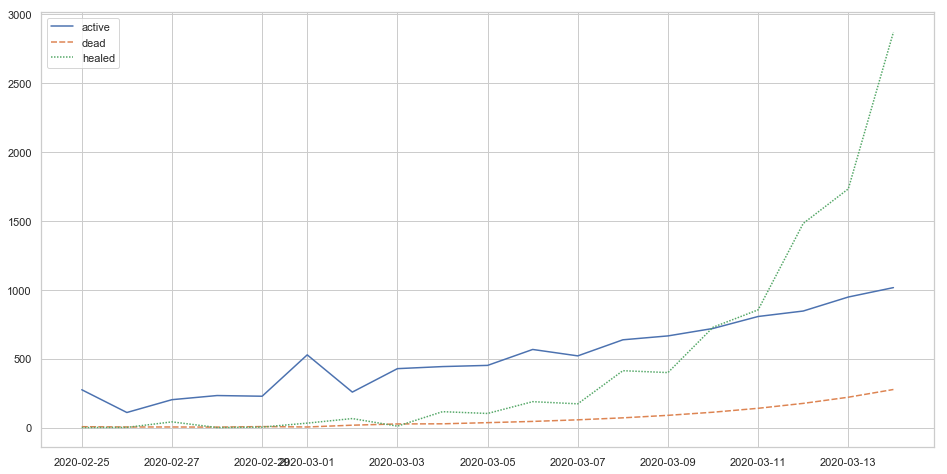

In [8]:
sns.set(style="whitegrid", rc={'figure.figsize':(16, 8)})
p = sns.lineplot(data=pred_df);

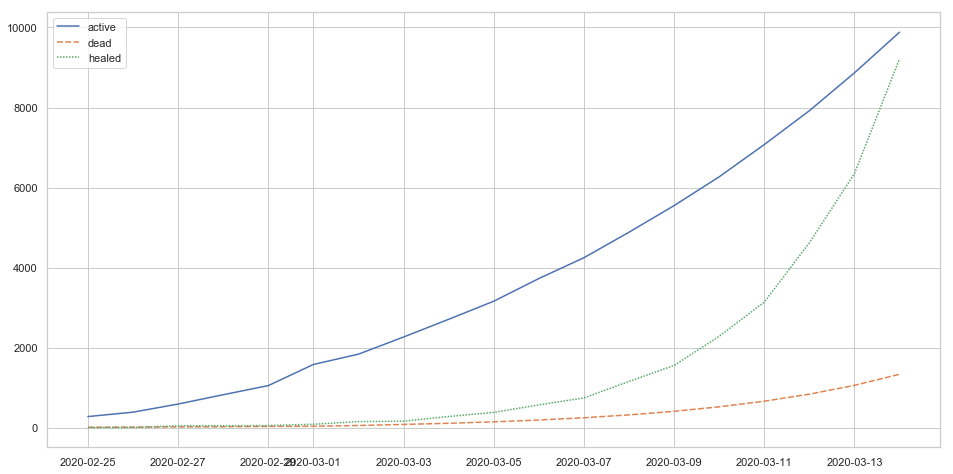

In [9]:
sns.set(style="whitegrid", rc={'figure.figsize':(16, 8)})
sns.lineplot(data=pred_df_cum);